<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8 - Automatic Gradient Training Loop

### Author: Aleksy Pruszkowski

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(42)
np.random.seed(42)
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

### Scenario 1
$L^{(0)}_{\text{ellipse}}\frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)$ only gives us information wheter we are in the desired place with respect to two foci, it is not differentiable and therefore we cannot compute the gradient and utilize it for training.

### Scenario 2

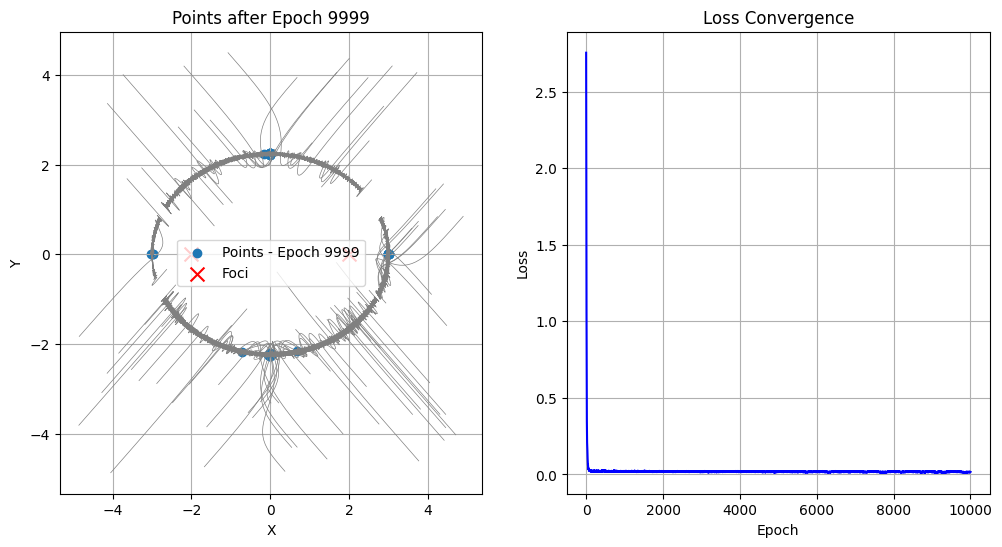

Epoch 9999: Loss = 0.015968


In [20]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    loss = torch.nanmean(torch.sqrt((dist1 + dist2 - constant_sum) **2))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())
plot_results(epoch, trajectories, loss_history)
print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

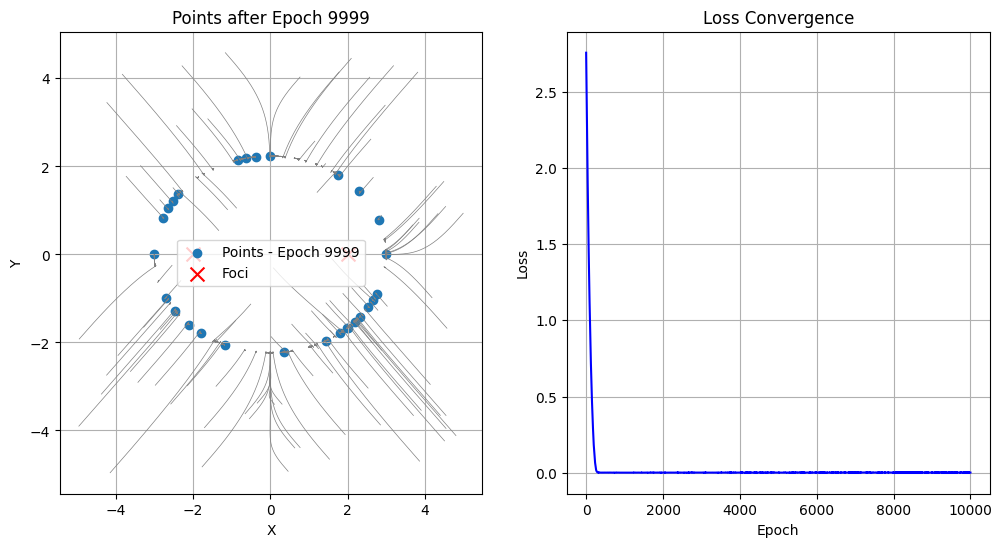

Epoch 9999: Loss = 0.002635


In [26]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

optimizer = torch.optim.Adam([points], lr=0.01)

# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    loss = torch.nanmean(torch.sqrt((dist1 + dist2 - constant_sum) **2))
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())
plot_results(epoch, trajectories, loss_history)
print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

$L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|$

For learning rate $0.1$ after some time the loss does not decrese. We can, however, decrease lr to $0.01$ and increase the number of epochs and the loss gets really small. After training even if the shape appears elliptical, small deviations across many points keep the loss from dropping to zero.

### Scenario 3

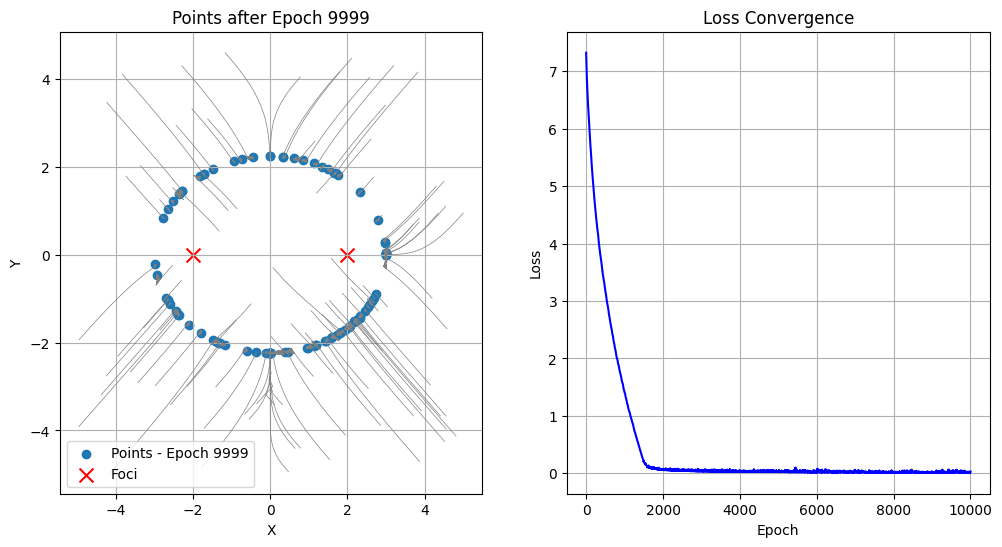

Epoch 9999: Loss = 0.029852


In [31]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []


import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.01)

# Training loop
num_epochs = 10000
# num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    loss = torch.max(torch.sqrt((dist1 + dist2 - constant_sum) **2)) # max|eps|, 3)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())
plot_results(epoch, trajectories, loss_history)
print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

$L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|$ focuses on single points rather than trying to optimize the whole dataset so we need a lot more epochs to get a reasonable looking elipse. The loss decreases in jumps as different points become the "worst" point that determines the loss.